# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={unit}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siwa oasis
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | vizinga
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | svyetlahorsk
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | tynda
Processing Record 12 of Set 1 | paris
Processing Record 13 of Set 1 | niafunke
Processing Record 14 of Set 1 | fonte boa
Processing Record 15 of Set 1 | gaiman
Processing Record 16 of Set 1 | cassino
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | codrington
Processing Record 23 of 

Processing Record 42 of Set 4 | nabire
Processing Record 43 of Set 4 | chinde
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | amungan
Processing Record 46 of Set 4 | novo aripuana
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | ternate
Processing Record 49 of Set 4 | dauphin
Processing Record 0 of Set 5 | san antonio de pale
Processing Record 1 of Set 5 | tayshet
Processing Record 2 of Set 5 | gereida
Processing Record 3 of Set 5 | cao bang
Processing Record 4 of Set 5 | filadelfia
Processing Record 5 of Set 5 | canutama
Processing Record 6 of Set 5 | ingeniero jacobacci
Processing Record 7 of Set 5 | lago da pedra
Processing Record 8 of Set 5 | tazacorte
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | amos
Processing Record 11 of Set 5 | iskilip
Processing Record 12 of Set 5 | mcalester
Processing Record 13 of Set 5 | iquique
Processing Record 14 of Set 5 | kruisfontein
Processing Record 15 of Set 5 | monte

Processing Record 33 of Set 8 | constantia
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | la gi
Processing Record 36 of Set 8 | beau vallon
Processing Record 37 of Set 8 | mostaganem
Processing Record 38 of Set 8 | paraty
Processing Record 39 of Set 8 | callao
Processing Record 40 of Set 8 | nadi
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | cromer
Processing Record 43 of Set 8 | bardai
Processing Record 44 of Set 8 | tidjikja
Processing Record 45 of Set 8 | bhatkal
Processing Record 46 of Set 8 | saiha
Processing Record 47 of Set 8 | pangkalanbuun
Processing Record 48 of Set 8 | howrah
Processing Record 49 of Set 8 | vernon
Processing Record 0 of Set 9 | mana
Processing Record 1 of Set 9 | cueibet
City not found. Skipping...
Processing Record 2 of Set 9 | parauapebas
Processing Record 3 of Set 9 | sechura
Processing Record 4 of Set 9 | fuvahmulah
City not found. Skipping...
Processing Record 5 of Set 9 | kolonia town
Processing Recor

Processing Record 22 of Set 12 | lincoln village
Processing Record 23 of Set 12 | metlili chaamba
Processing Record 24 of Set 12 | val-d'or
Processing Record 25 of Set 12 | san martin
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | northam
Processing Record 28 of Set 12 | torata
Processing Record 29 of Set 12 | loikaw
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [14]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,14.01,41,5,4.25,NZ,1701651838
1,college,64.8569,-147.8028,-20.31,70,20,0.00,US,1701651840
2,brokopondo,4.7500,-55.1667,26.53,75,97,3.58,SR,1701651842
3,port-aux-francais,-49.3500,70.2167,4.50,81,12,14.81,TF,1701651843
4,aykhal,66.0000,111.5000,-38.59,99,60,2.46,RU,1701651845
5,lospalos,-8.5186,127.0025,29.90,60,37,3.52,TL,1701651846
6,puerto natales,-51.7236,-72.4875,4.42,98,58,1.82,CL,1701651848
7,albany,42.6001,-73.9662,5.30,93,100,0.89,US,1701651642
8,edinburgh of the seven seas,-37.0676,-12.3116,14.79,83,0,4.16,SH,1701651850
9,invercargill,-46.4000,168.3500,12.63,48,9,4.98,NZ,1701651852


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,14.01,41,5,4.25,NZ,1701651838
1,college,64.8569,-147.8028,-20.31,70,20,0.00,US,1701651840
2,brokopondo,4.7500,-55.1667,26.53,75,97,3.58,SR,1701651842
3,port-aux-francais,-49.3500,70.2167,4.50,81,12,14.81,TF,1701651843
4,aykhal,66.0000,111.5000,-38.59,99,60,2.46,RU,1701651845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

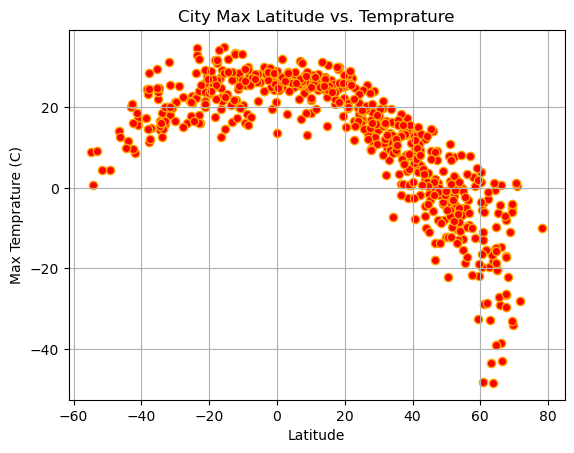

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Max Latitude vs. Temprature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

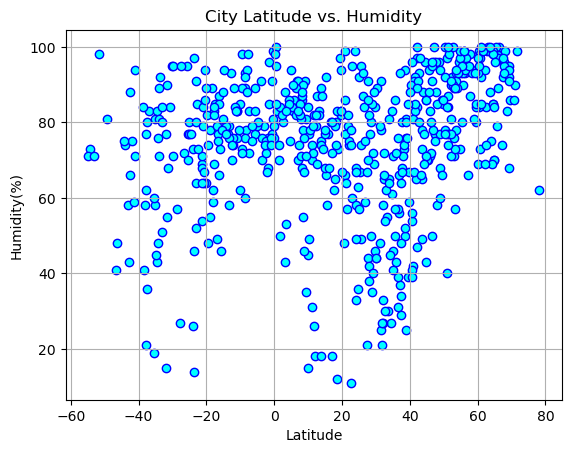

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

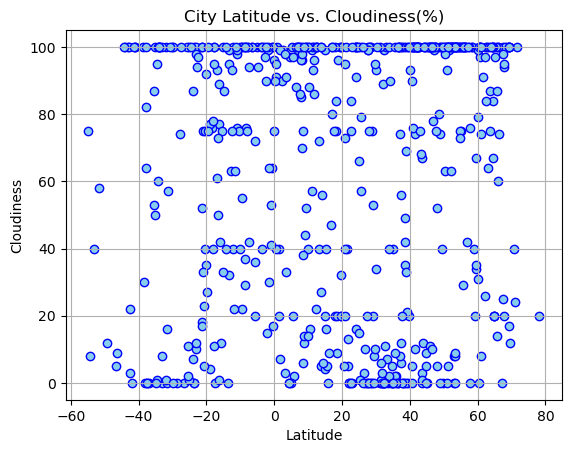

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness(%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

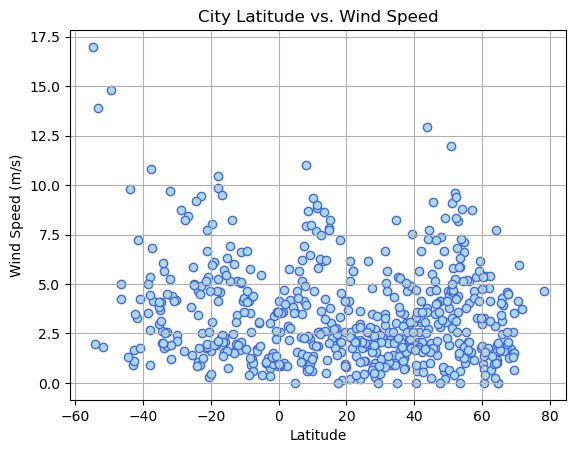

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
feature_latVsTemp = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
feature_latVsHum = linregress(city_data_df["Lat"], city_data_df["Humidity"])
feature_latVsCloud = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
feature_latVsWind = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-20.31,70,20,0.00,US,1701651840
2,brokopondo,4.7500,-55.1667,26.53,75,97,3.58,SR,1701651842
4,aykhal,66.0000,111.5000,-38.59,99,60,2.46,RU,1701651845
7,albany,42.6001,-73.9662,5.30,93,100,0.89,US,1701651642
10,jamestown,42.0970,-79.2353,4.75,97,100,6.69,US,1701651853


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,14.01,41,5,4.25,NZ,1701651838
3,port-aux-francais,-49.3500,70.2167,4.50,81,12,14.81,TF,1701651843
5,lospalos,-8.5186,127.0025,29.90,60,37,3.52,TL,1701651846
6,puerto natales,-51.7236,-72.4875,4.42,98,58,1.82,CL,1701651848
8,edinburgh of the seven seas,-37.0676,-12.3116,14.79,83,0,4.16,SH,1701651850


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8750425853972168


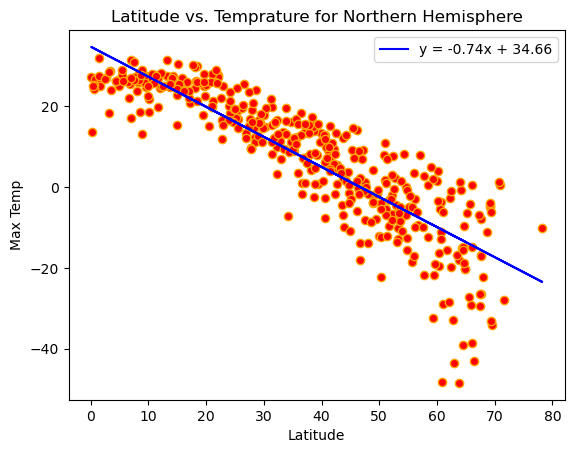

In [24]:
# Linear regression on Northern Hemisphere
feature_latVsTemp_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

slope = feature_latVsTemp_north[0]
intercept = feature_latVsTemp_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(northern_hemi_df["Lat"], y, color = 'blue', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_north[2]}")
plt.show()

The r-value is 0.6251939870856578


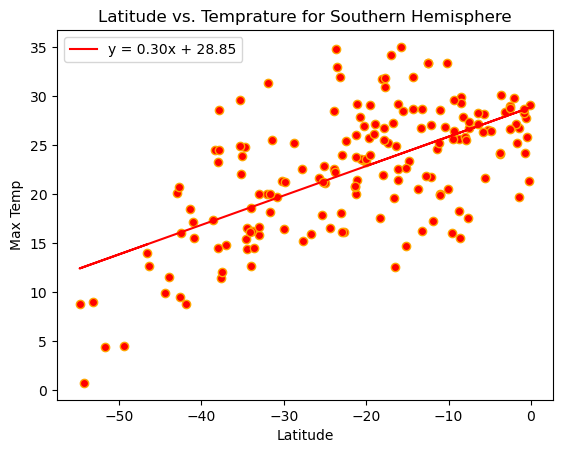

In [25]:
# Linear regression on Southern Hemisphere
feature_latVsTemp_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

slope = feature_latVsTemp_south[0]
intercept = feature_latVsTemp_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.30800953828077365


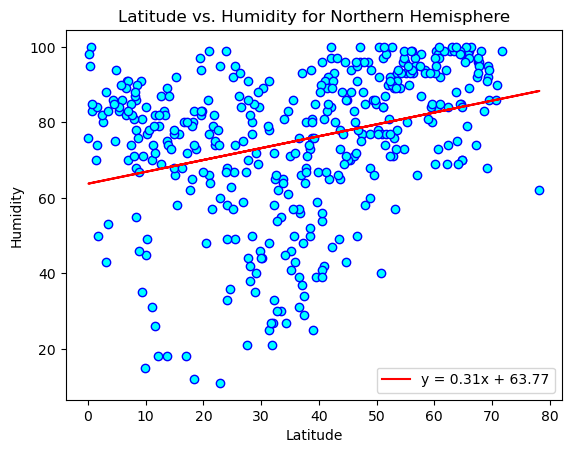

In [26]:
# Northern Hemisphere
feature_latVsHum_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

slope = feature_latVsHum_north[0]
intercept = feature_latVsHum_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_north[2]}")
plt.show()

The r-value is 0.3004742259308961


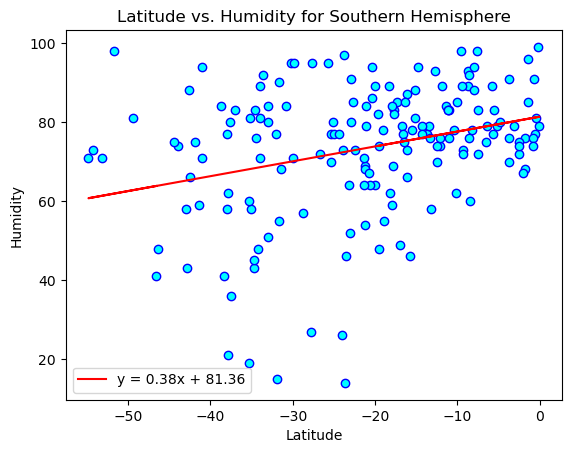

In [27]:
# Southern Hemisphere
feature_latVsHum_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

slope = feature_latVsHum_south[0]
intercept = feature_latVsHum_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1188514285974177


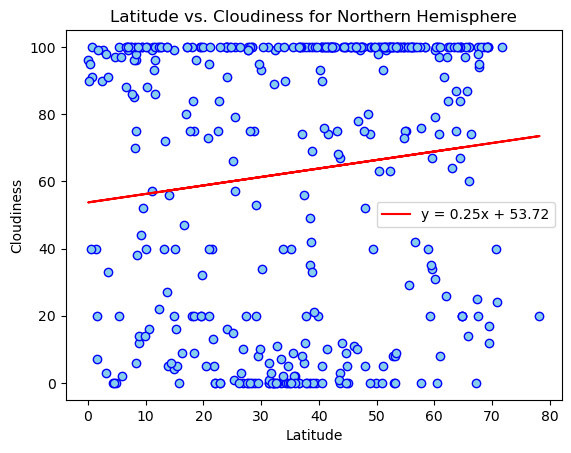

In [28]:
# Northern Hemisphere
feature_latVsCloud_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_north[0]
intercept = feature_latVsCloud_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_north[2]}")
plt.show()

The r-value is 0.19847330749032444


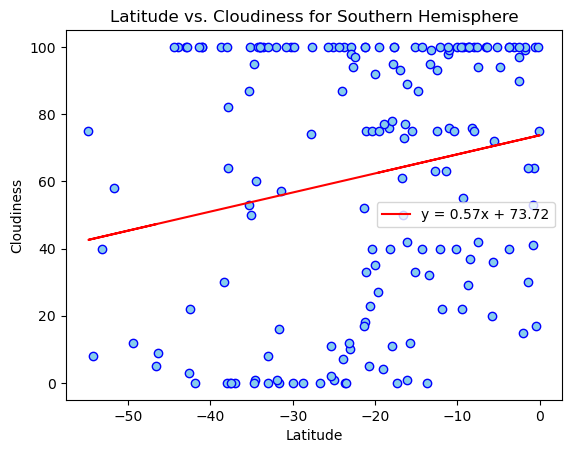

In [29]:
# Southern Hemisphere
feature_latVsCloud_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_south[0]
intercept = feature_latVsCloud_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.0035395393259489718


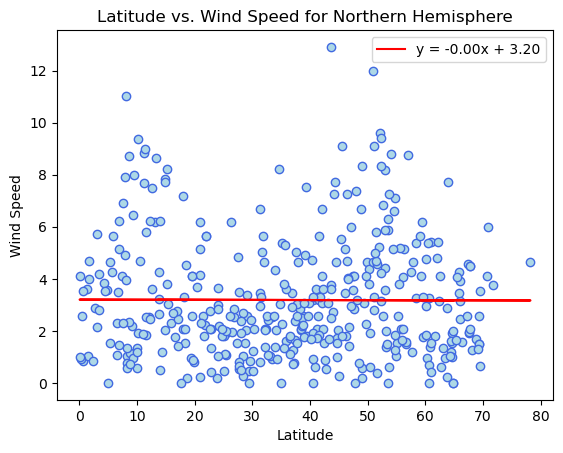

In [30]:
# Northern Hemisphere
feature_latVsWind_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

slope = feature_latVsWind_north[0]
intercept = feature_latVsWind_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_north[2]}")
plt.show()

The r-value is -0.3236672024336941


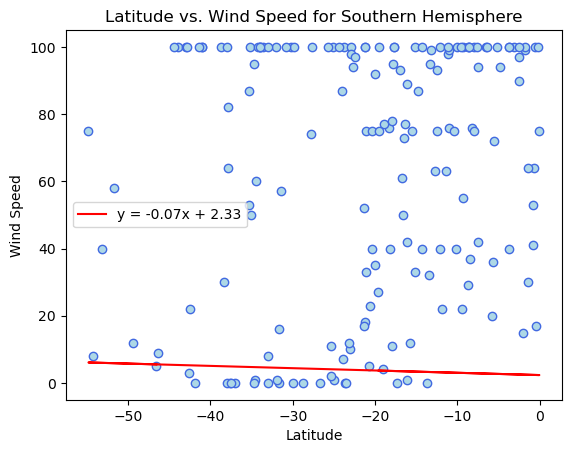

In [31]:
# Southern Hemisphere
feature_latVsWind_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

slope = feature_latVsWind_south[0]
intercept = feature_latVsWind_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As we check the Latitude Vs. Maximum temprature for both Northern Hemisphere and Southern Hemisphere. Temprature tends to decrease as we go away from the equator (latitude = 0), either in North(where latitude is greater than zero) or South(where latitude is less than zero) in both graphs, based on the line regression. 

While, upon checking the Latitude Vs. Humidity for Northern Hemisphere. Humidity tends to increase as we go north(as Latitude increases) but when checking the same for Southern Hemisphere. Humidity is lower in southern most region(where latitude is least) and increases as we move toward the equator.

Furthermore, The  trend seen in case of Latitude Vs. Cloudiness is same as Latitude Vs. Humidity, for both Northern and Southern Hemispheres.

Moreover, Upon checking the Latitude Vs. Wind Speed in Northern Hemisphere, it tends to remain same through the way from Equator (latitude = 0) to North Pole(latitude = 90) based on Linear equation but scatter plot suggest that Windspeed data is scattered all over the graph. While in case of Southern Hemisphere, Windspeed has just minor decrease as we go toward equator(latitude = 0).
